# Math 3410: Orthogonal Diagonalization Example

Consider the following matrix:

$$A = \begin{bmatrix}3&5&-1&1\\5&3&1&-1\\-1&1&3&5\\1&-1&5&3\end{bmatrix}$$

(This is an exercise from Nicholson -- notice the block form: $A = \begin{bmatrix}A_1&A_2\\A_2&A_1\end{bmatrix}$)

Let's find the eigenvalues:

In [13]:
from sympy import *
init_printing()
A = Matrix([[3,5,-1,1],[5,3,1,-1],[-1,1,3,5],[1,-1,5,3]])
factor(A.charpoly().as_expr())

The eigenvalues are $-4, 0$, and $8$ (which has multiplicity 2). Let's get the eigenvectors:

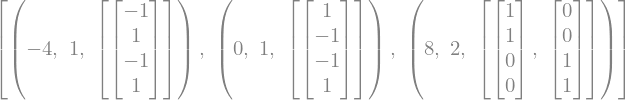

In [3]:
L=A.eigenvects()
L

Our eigenvectors are:

$X = \begin{bmatrix}-1\\1\\-1\\1\end{bmatrix}$, corresponding to $\lambda =-4$, 
$Y = \begin{bmatrix}1\\-1\\-1\\1\end{bmatrix}$, corresponding to $\lambda = 0$,
$Z_1 = \begin{bmatrix}1\\1\\0\\0\end{bmatrix}$ and $Z_2 = \begin{bmatrix}0\\0\\1\\1\end{bmatrix}$, corresponding to $\lambda=8$.

Notice that $X$ is orthogonal to $Y, Z_1, Z_2$, $Y$ is orthogonal to $Z_1, Z_2$ (and $X$, of course). This much is guaranteed.

We also see that $Z_1$ is orthogonal to $Z_2$, which is **not** guaranteed - we got lucky! Ordinarily, for repeated eigenvalues we have to use the Gram Schmidt algorithm to produce an orthogonal basis for the corresponding eigenspace.

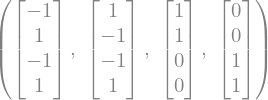

In [4]:
X = L[0][2][0]
Y = L[1][2][0]
Z1= L[2][2][0]
Z2= L[2][2][1]
EV=X,Y,Z1,Z2
EV

In caes you want confirmation that these are eigenvectors:

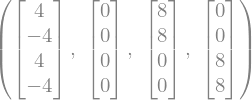

In [5]:
A*X, A*Y, A*Z1, A*Z2

Or, more efficiently:

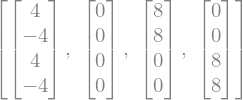

In [6]:
eigen_check = list()
for i in range(4):
    eigen_check.append(A*EV[i])
eigen_check

Notice that any linear combination of $Z_1$ and $Z_2$ is again an eigenvector for $\lambda=8$:

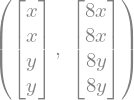

In [7]:
x,y=symbols('x,y')
Z = x*Z1+y*Z2
Z,A*Z

Next, we diagonalize. The matrix $P$ is formed by normalizing our eigenvectors, and writing them as columns in a matrix.

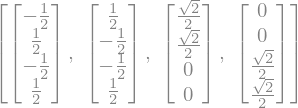

In [8]:
eigen_onb = list()
for i in range(4):
    eigen_onb.append((1/EV[i].norm())*EV[i])
eigen_onb

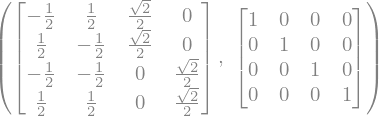

In [9]:
P = Matrix(BlockMatrix(eigen_onb))
P,P*P.T

Now we can diagonalize. Notice that since $P$ is orthogonal, $P^T=P^{-1}$

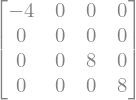

In [10]:
D=(P.T)*A*P
D

One thing diagonalization is good for is efficiently computing powers of matrices:

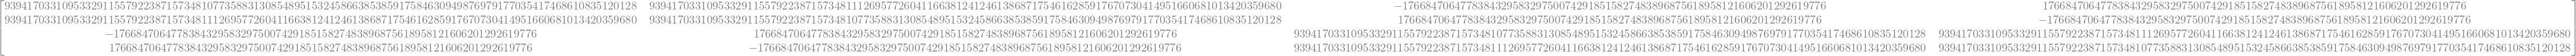

In [11]:
A**121

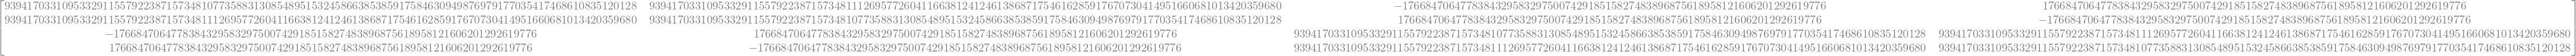

In [12]:
P*(D**121)*P.T